hi.

in this chapter we want to learn about supervised learning.

---------------------

In [36]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer();

* first we should check its keys and description.

In [22]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [23]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

as you can see we have 30 columns (30 features) and 2 targets.

* because we assign each row to a specific column , so it is a supervised learning.

* because we have two target , it is a binary classification.

so it is a classification supervised learning problem
------------------------------

In [20]:
import numpy as np
for i in zip(data.target_names , np.bincount(data.target)):
    print(i[0]+"  {}".format(i[1]))


malignant  212
benign  357


* now lets draw scatter plot this datas.

In [28]:
import pandas as pd
dataframe = pd.DataFrame(data.data , columns = data.feature_names)
dataframe[:4]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


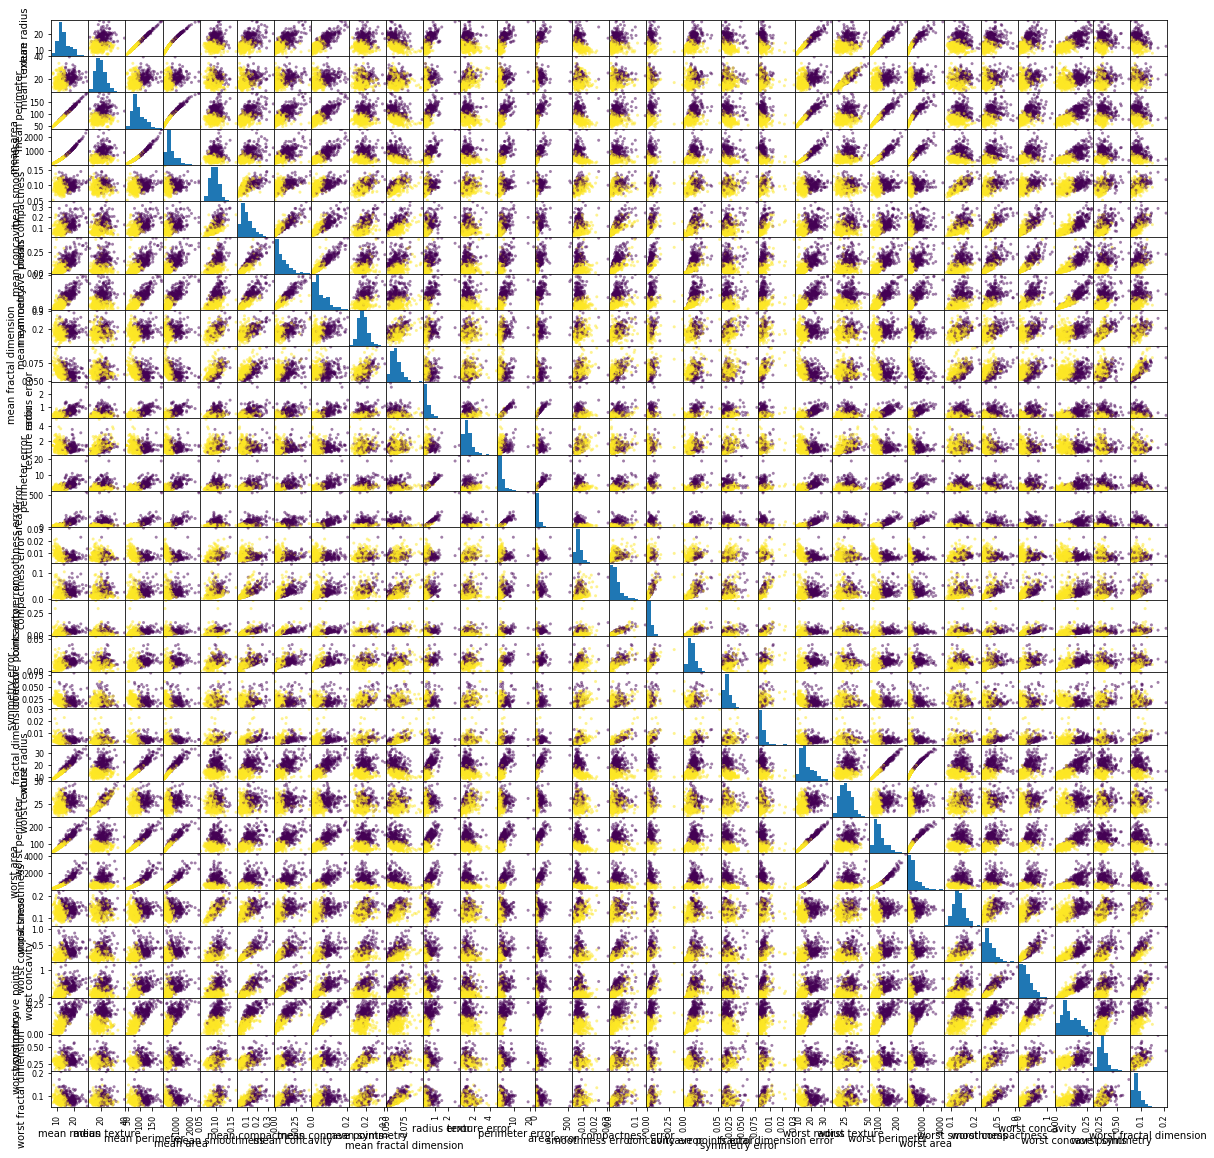

In [35]:
pd.plotting.scatter_matrix(dataframe , c=data.target , figsize =(20 , 20) );

lets choose 2 features to continue.

for example feature 1 and 7.

In [37]:
feature1 = data.data[:,0];
feature2 = data.data[:,6];
X = np.array(list(zip(feature1 , feature2)))

lets create a function to plot boundary.

In [133]:
import matplotlib.pyplot as plot
def plot2_feature(classifier , X , part = 1000):
    eps = 0;
    ax = plot.gca()
    xx1 = np.linspace(X[:,0].min()-eps ,X[:,0].max()+eps ,part);
    xx2 = np.linspace(X[:,1].min()-eps , X[:,1].max()+eps,part);
    x1 , x2 = np.meshgrid(xx1 , xx2);
    X_grid = np.c_[x1.ravel() , x2.ravel()];
    decision_value = classifier.predict(X_grid);
    ax.imshow(decision_value.reshape(x1.shape) ,extent=(X[:,0].min()-eps , X[:,0].max()+eps ,X[:,1].min()-eps , X[:,1].max()+eps),aspect='auto')
    ax.set_xlim(X[:,0].min()-eps, X[:,0].max()+eps)
    ax.set_ylim(X[:,1].min()-eps, X[:,1].max()+eps)
    ax.set_xticks(())
    ax.set_yticks(())
    
def plot2_dots(X , y):
    x1 = X[y==0];
    x2 = X[y==1];
    plot.scatter(x1[:,0] , x1[:,1] , marker="1");
    plot.scatter(x2[:,0] , x2[:,1] , marker="2")

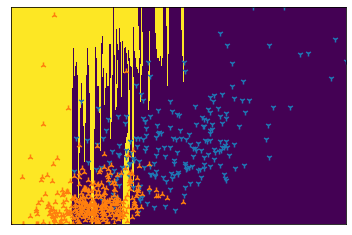

In [136]:
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X , data.target)
plot2_feature(knn , X)
plot2_dots(X , data.target)

-------------------------------

now lets see accuracy with different n_neighbors

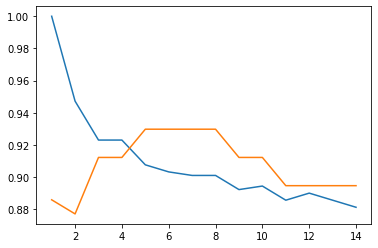

In [145]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , data.target , test_size=0.2);
k_neighbors = np.arange(1,15)
test_accuracy =[];
train_accuracy = [];
for k in k_neighbors:
    model = KNeighborsClassifier(n_neighbors = k);
    model.fit(X_train , y_train);
    test_accuracy.append(model.score(X_test , y_test));
    train_accuracy.append(model.score(X_train , y_train))
plot.plot(k_neighbors ,train_accuracy);
plot.plot(k_neighbors ,test_accuracy );


orange plot is for Test Set and blue one is for training set

so there is a trade_off between training set accuracy and test set accuracy
--------------------------

in sklearn.neighbors , KNeighborsRegressor exist and is for reggresion problem.

Good Luck
-------------

---------------------

In [182]:
import numpy as np
data_x = np.arange(1,10,0.25).reshape(36,1)
data_y = np.sin(data_x);

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 2);
model.fit(data_x , data_y);
z = model.predict([[3.141]]);
print(z);

[[0.01646244]]
